# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

data = pd.read_csv('data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   sexo                                    6770 non-null   int64  
 1   posse_de_veiculo                        6770 non-null   int64  
 2   posse_de_imovel                         6770 non-null   int64  
 3   qtd_filhos                              6770 non-null   int64  
 4   idade                                   6770 non-null   float64
 5   tempo_emprego                           6770 non-null   float64
 6   possui_celular                          6770 non-null   int64  
 7   possui_fone_comercial                   6770 non-null   int64  
 8   possui_fone                             6770 non-null   int64  
 9   possui_email                            6770 non-null   int64  
 10  qt_pessoas_residencia                   6770 non-null   floa

In [18]:
data.head(5)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,0,0,58.832877,3.106849,1,0,0,0,...,True,True,False,False,False,True,False,False,False,False
1,1,1,0,0,52.356164,8.358904,1,0,1,1,...,True,False,False,True,False,True,False,False,False,False
2,0,0,0,0,46.224658,2.106849,1,1,1,1,...,False,True,False,False,False,True,False,False,False,False
3,1,0,1,0,29.230137,3.021918,1,0,0,0,...,False,True,False,False,False,True,False,False,False,False
4,1,1,0,0,27.482192,4.024658,1,0,1,0,...,True,True,False,False,False,True,False,False,False,False


In [19]:
X = data.drop('mau', axis=1)
y = data['mau']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

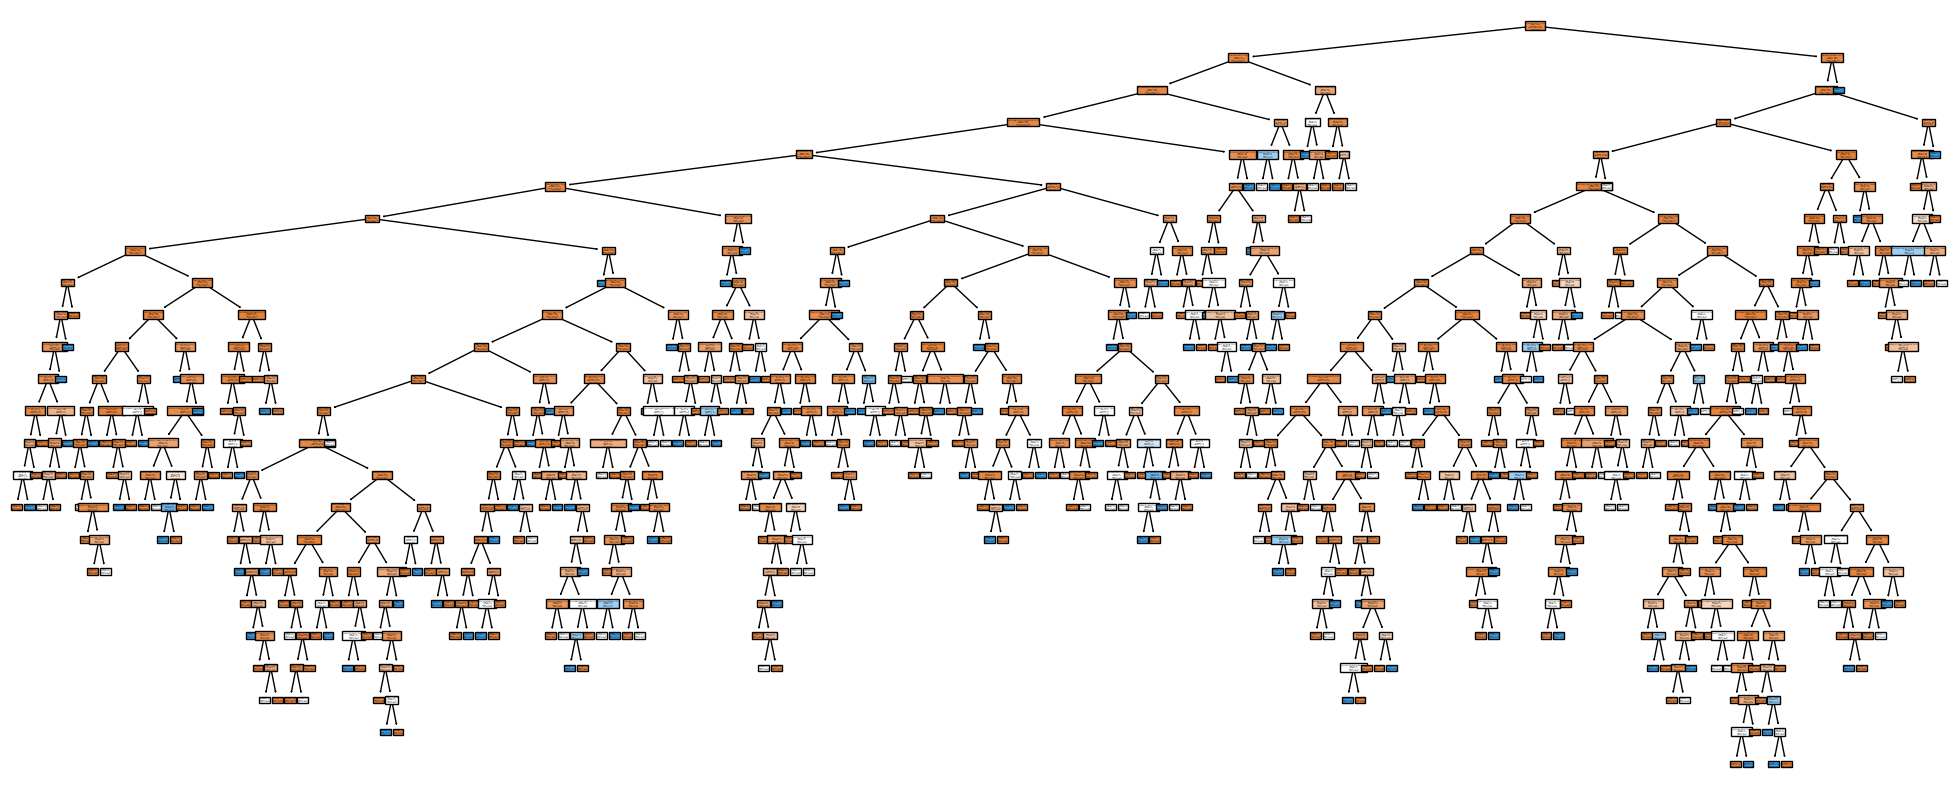

In [20]:
# 1)
modelo_arvore_decisao = DecisionTreeClassifier(random_state = 42)

#2)
modelo_arvore_decisao.fit(X_train, y_train)

#3)
plt.figure(figsize = (25,10))
plot_tree(modelo_arvore_decisao.fit(X_train, y_train),
          filled = True,
          class_names = ['mau','bom'],
          feature_names = X.columns);


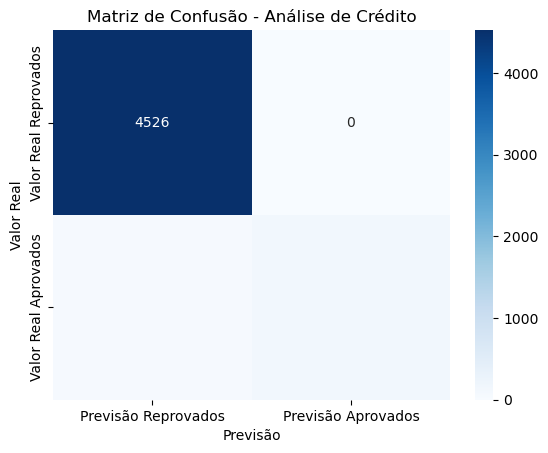

In [21]:
#4)
y_pred = modelo_arvore_decisao.predict(X_train)
matriz_confusao = confusion_matrix(y_train, y_pred)

df_matriz_confusao = pd.DataFrame(matriz_confusao, columns=['Previsão Reprovados', 'Previsão Aprovados'], index=['Valor Real Reprovados', 'Valor Real Aprovados'])

sns.heatmap(df_matriz_confusao, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão - Análise de Crédito')
plt.show()

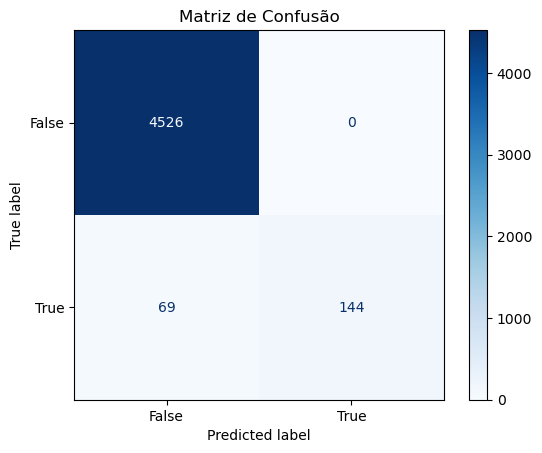

In [32]:
mat_conf = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=mat_conf, display_labels=modelo_arvore_decisao.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.show()

In [23]:
matriz_confusao = confusion_matrix(y_train, y_pred)
print(matriz_confusao)

[[4526    0]
 [  69  144]]


In [24]:
#5)
pontuacao_validacao = modelo_arvore_decisao.score(X_test, y_test)
print("Pontuação de validação:", pontuacao_validacao)

Pontuação de validação: 0.9049729197439685


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [25]:
#1)
y_pred_test = modelo_arvore_decisao.predict(X_test)

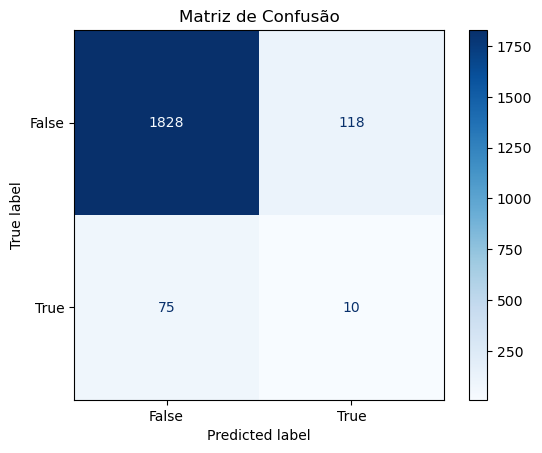

In [26]:
#2)
conf_mat = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=modelo_arvore_decisao.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.show()

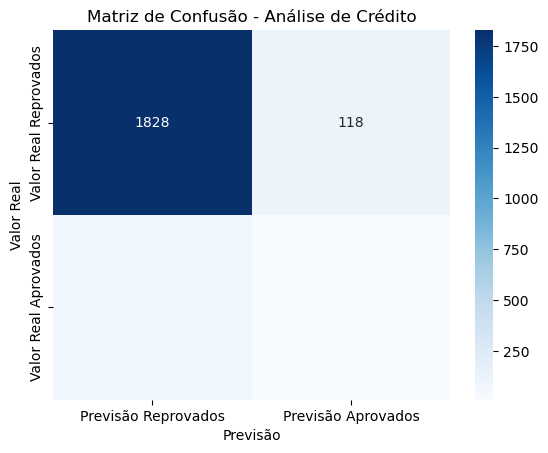

In [27]:
y_pred_test = modelo_arvore_decisao.predict(X_test)
matriz_confusao_teste = confusion_matrix(y_test, y_pred_test)

df_matriz_confusao_teste = pd.DataFrame(matriz_confusao_teste, columns=['Previsão Reprovados', 'Previsão Aprovados'], index=['Valor Real Reprovados', 'Valor Real Aprovados'])

sns.heatmap(df_matriz_confusao_teste, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão - Análise de Crédito')
plt.show()

In [28]:
matriz_confusao = confusion_matrix(y_test, y_pred_test)
print(matriz_confusao)

[[1828  118]
 [  75   10]]


In [40]:
#3)
# Previsões no conjunto de treinamento
y_pred_train = modelo_arvore_decisao.predict(X_train)

# Previsões no conjunto de teste
y_pred_test = modelo_arvore_decisao.predict(X_test)

# Calculando a acurácia no conjunto de treinamento
accuracy_train = accuracy_score(y_train, y_pred_train)

# Calculando a acurácia no conjunto de teste
accuracy_test = accuracy_score(y_test, y_pred_test)

# Exibindo as acurácias
print(f"Acurácia no conjunto de treinamento: {accuracy_train * 100:.2f}%")
print(f"Acurácia no conjunto de teste: {accuracy_test * 100:.2f}%")

Acurácia no conjunto de treinamento: 98.54%
Acurácia no conjunto de teste: 90.50%


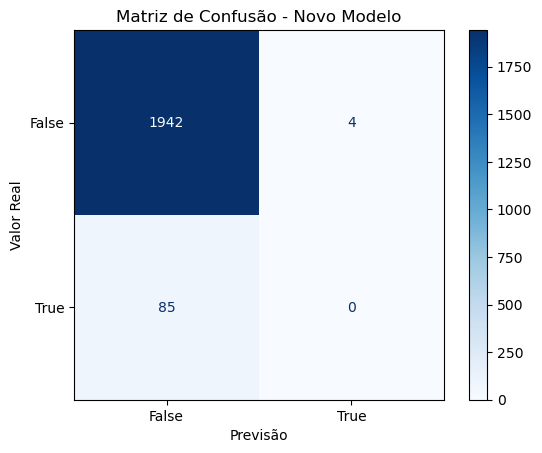

A proporção de bons pagadores classificados como maus foi de: 0.20%


In [43]:
novo_modelo_arvore_decisao = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
novo_modelo_arvore_decisao.fit(X_train, y_train)

y_pred_test_novo = novo_modelo_arvore_decisao.predict(X_test)

nova_matriz_confusao = confusion_matrix(y_test, y_pred_test_novo)

disp = ConfusionMatrixDisplay(confusion_matrix=nova_matriz_confusao, display_labels=novo_modelo_arvore_decisao.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão - Novo Modelo')
plt.show()

maus_preditos = (y_pred_test_novo == True).sum()
total_predicoes = len(y_pred_test_novo)
proporcao_maus = maus_preditos / total_predicoes

print(f"A proporção de bons pagadores classificados como maus foi de: {proporcao_maus * 100:.2f}%")

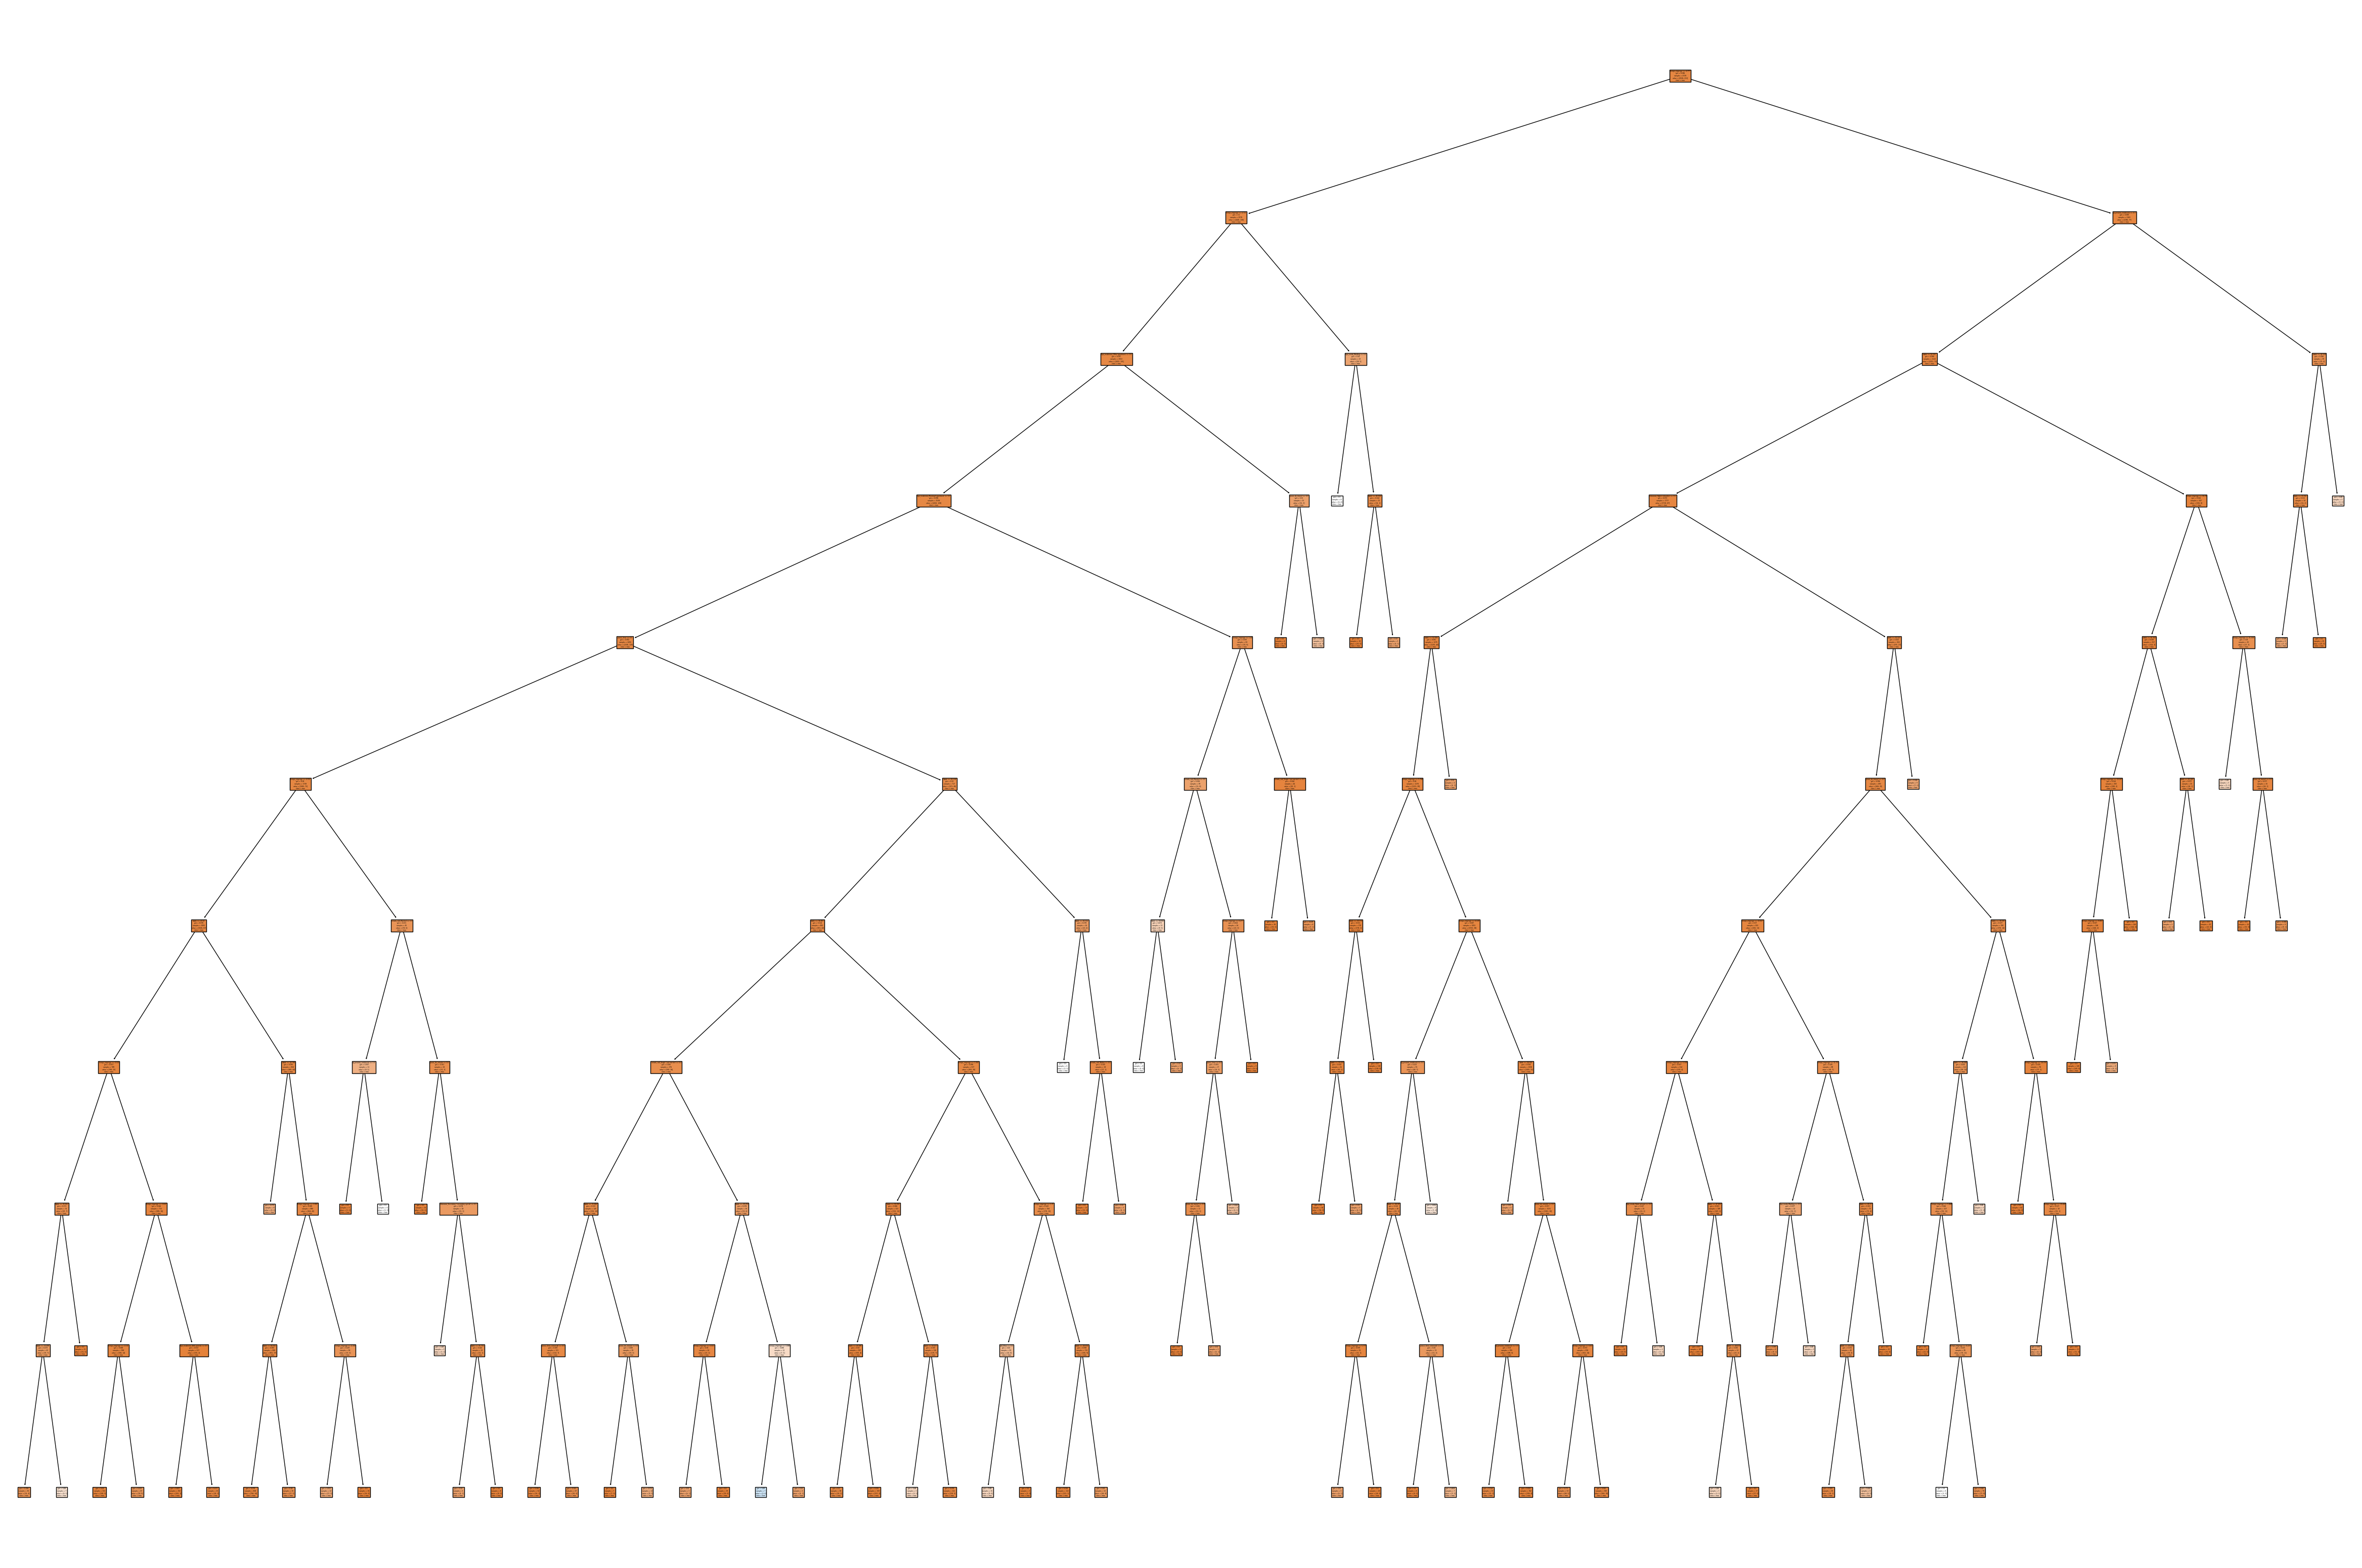

In [45]:
#4)
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state = 123)
clf.fit(X_train,y_train)

plt.figure(figsize = (60,40))
plot_tree(clf,
          filled = True,
          class_names = ['mau','bom'],
          feature_names = X.columns);

In [46]:
#5)
y_pred_all_good = np.zeros_like(y_test, dtype=bool)  # False para todos

accuracy_all_good = accuracy_score(y_test, y_pred_all_good)

print(f"Acurácia classificando todos como 'bons': {accuracy_all_good * 100:.2f}%")

Acurácia classificando todos como 'bons': 95.81%
